# **Team 13**
### Fawaz Imtiaz
### Sardar Nafis Bin Ali
### Rohan Ponramesh
### Vishal Kumar

![ts](https://www.investopedia.com/thmb/jmL29zJcG1pdM3tTcWWdhRmYOs8=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/TermDefinitions_TimeSeries__V1_CT-dc0c9cecb7ff462c85ce38af344a908c.jpg)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

____

#### <font color='red'> Due at midnight. </font>

<font color='purple'> One notebook from your group. Be sure to list who worked on this. </font>

<font color='purple'> Read everything first so that you can pace yourself. Let us know if you have any questions. I recommend starting with the <font color=#FFAA00> Time Series Analysis </font> section, since that is where most of your questions/issues are likely to arise. </font>

____

# <font color=#00AAFF> Time Series Analysis </font>

In this ICA we are going to learn how to treat <font color='green'>time series data </font>using methods we have already learned in this class.

In addition to learning about this particular data science spplication, the goal is to potentially give you tools for making your final project much more interesting.

The basic idea is this: many types of analysis can be done using fairly simple methods. Not all data science goals require complicated algorithms. You _already_ have the tools to do time series forecasting!


## <font color=#FFAA00> Brainstorming Data Applications and Techniques </font>

In the first part of this ICA, you will have two, related discussions with your group.

In the first discussion, brainstorm on the many types of data analysis that could be done based on methods we have learned in this class if you adapted them. Use any resources you have to help with your discussion. In a markdown cell, summarize your discussion, perhaps using a table of applications and techniques.

Just to get you started, how would you approach: image data? video data? sound data? multimodal data? language? Could you use SVD for these?

In the second discussion, you are going to have basically the same discussion but with the _specific focus of regression_. Think, and search, widely to list many applications for regression. What creative ways can you use simple regression?



![rbf](https://gamedevacademy.org/wp-content/uploads/2017/10/Curve-Fitting.gif)

## <font color=#FFAA00> Interpolation, Extrapolation and Forecasting </font>

We have discussed various techniques for building a model from data. For example, we could fit the data to a hyperplane and use that as our predictive model.

With your group, list all of the models we have considered in this class and research some models we haven't discussed.


Next, discuss the difference between interpolation and extrapolation. Which of these models are particularly good or bad at extrapolation? For example, what can we always expect if we model our data with a polynomial?


How is smoothing related to interpolation? How would you smooth data rather than fit it perfectly?

Put all of your thoughts into a markdown cell.

In yet another discussion with your group, discuss forecasting. What is it? How is it related to interpolation? Extrapolation?

Note that forecasting is not _exactly_ the same as extrapolation because _**time has one direction**_: we have the extra notion that data later in time depends on data earlier in time, but not the other way around.

Add your group's thoughts to a markdown cell.

If we want to forecast, for example, the weather, can we use regression? What does your group think? If you decide it's possible, how would you do it? If it is not possible, why is that?



### Ans:
Models Considered in Class and Additional Models to Explore
Models Discussed:
Linear Regression - Fitting data to a straight line.
Polynomial regression - Fitting higher order curves in order to capture the complex patterns.
KDE - Fitting gaussians around the data points to estimate kernel density estimation.

Additional Models to Research:
Random Forests
Gradient Boosting Machines
K-Nearest Neighbors
Naive Bayes Classifier
Hidden Markov Models

Interpolation vs. Extrapolation
Interpolation involves estimating values within the range of the data points.
Extrapolation involves predicting values outside the range of the data points.

Models and Extrapolation:
Polynomial Regression often leads to wild extrapolations for high-degree polynomials.
Linear Regression can be more stable for extrapolation but may not capture complex patterns.

Smoothing and Its Relation to Interpolation
Smoothing involves reducing noise and making a dataset more interpretable.
It's related to interpolation but focuses more on the trend rather than fitting each data point exactly.
Techniques like moving averages or lowess (locally weighted scatterplot smoothing) can be used.

Forecasting: Definition and Relation to Interpolation and Extrapolation
Forecasting is predicting future values based on historical data.
It's similar to extrapolation but considers the time series aspect where future values depend on past values.
Unlike interpolation, forecasting does not focus on estimating within existing data points but beyond them.
Using Regression for Weather Forecasting
Regression can be used for weather forecasting by considering past weather data as input.
Challenges include non-linearity, high variability, and the need for large datasets.
Techniques like time series analysis or machine learning models (e.g., neural networks) might be more suitable than simple regression models.


![hurricane](https://www.nhc.noaa.gov/images/cone_5day_with_wind.png)

## <font color=#FFAA00> Time Series Analysis </font>

Time series analysis (TSA) is a huge topic. Today we will only focus on one aspect of it, which is forecasting. Forecasting simply refers to the prediction of a future trend. We all wish we could forecast the stock market better than everyone else! We would also like to forecast the weather, either on a local scale to ensure we can plan our weekend or on a larger scale if we are in charge of evacuating a large region of the country to protect people from a hurricane.

We will use a dataset for weather for East Lansing, which is in D2L with this notebook. We will do a simple version of this in today's ICA, but you might consider doing more for your final project! I put some of the basic code below to save you some time. Read through the code below so that you know a bit about this dataset. Then, we'll do the forecasting!

Note that this dataset has _**a lot**_ more information then we will use in this ICA. We are barely using what is here, which makes this is natural starting point for your final project if you would like to explore forecasting.




In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/rohanramesh38/CMSE-830/main/11_ICA/weather_EL.csv")

temps = df["temp"][:100000:1000].to_numpy()

df.head(3)

,dt,dt_iso,timezone,city_name,lat,lon,temp,visibility,dew_point,feels_like,...,wind_gust,rain_1h,rain_3h,snow_1h,snow_3h,clouds_all,weather_id,weather_main,weather_description,weather_icon
0,283996800,1979-01-01 00:00:00 +0000 UTC,-18000,East Lansing,42.736979,-84.483865,272.63,4000.0,272.01,267.19,...,NaN,NaN,NaN,NaN,NaN,90,741,Fog,fog,50n
1,284000400,1979-01-01 01:00:00 +0000 UTC,-18000,East Lansing,42.736979,-84.483865,272.63,4000.0,272.01,267.19,...,NaN,NaN,NaN,NaN,NaN,90,741,Fog,fog,50n
2,284004000,1979-01-01 02:00:00 +0000 UTC,-18000,East Lansing,42.736979,-84.483865,272.14,NaN,271.77,267.71,...,NaN,NaN,NaN,NaN,NaN,100,804,Clouds,overcast clouds,04n


In [ ]:
len(df)

414847

In [ ]:
df.isna().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
visibility              54063
dew_point                   0
feels_like                  0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              414847
grnd_level             414847
humidity                    0
wind_speed                  0
wind_deg                    0
wind_gust              365709
rain_1h                362390
rain_3h                414669
snow_1h                398424
snow_3h                414761
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

Text(0, 0.5, 'temperature [K]')

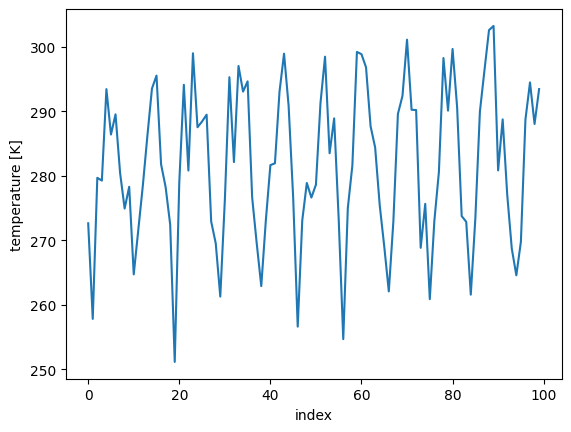

In [ ]:
plt.plot(temps)
plt.xlabel("index")
plt.ylabel("temperature [K]")

Ok, we have some simple weather data. Let's forecast it!

## <font color=#FFAA00> One-Step-Ahead Forecasting </font>

Our next task is to turn what we already know about regression to a forecasting algorithm, which we will use to forecast the weather. As we will see, all we need to do is organize our thoughts and the data and we can use everything we already know!

We will need **three** important ideas.

A major goal for today is that you learn to be creative with all data science techniques. Given all of the math and tools available, you can piece them together however you wish to create unique data science solutions.

The algorithm we will use today is based on this simple idea: _we take $N$ points at the end of our dataset and predict the next point_. Since regression only knows there is an input $X$ and an output $y$, it does "care" that the data came from a time series; and, what a great way to predict the weather tomorrow - use the weather for the past few days! This is our first idea: we get started by using the data at the very end of the dataset and start by predicting the first future time point.

Now, you might be thinking: I never want to forecast for just one more day! I need to forecast for many, many days! For this, we need the second important idea: once we make a prediction, we add that to our previous dataset and then forecast again using this new dataset. Said another way: we use $N$ (final) points to predict the future value $y$, which is appended to the end of the dataset for use in the next prediction. We then predict this over and over and over until we are done. When you do this many times, it is called "multi-step ahead".

Discuss this diagram with your group:

![stepahead](https://pub.mdpi-res.com/energies/energies-13-04121/article_deploy/html/images/energies-13-04121-g003.png?1597113169)

Pay close attention to the red dashed box, which slides to the right as each prediction is made, using more and more of the previous predictions.

 Discuss with your group several "obvious ways" you would do the forecasting. What are the pros and cons of each approach? I'll help you get started:
 * just use the final value as the next value
 * use the average of the final three values
 * be creative!

If you have time, these are very easy to code! Try them!





 ### <font color=#DD8800> Use Linear Algebra </font>

 Here is the logic we will use: we want to use _all_ of the available data to predict the trend. As usual, the hardest part is data organization - the actual math is "easy". Here is the logic:
 * take the _first_ $N$ data points and predict the $(N+1)$th,
 * shift by one point and use points $2 - (N+1)$ to predict the $(N+2)$th point
 * continue through the entire data set....

 We can organize our data like this:

 $${\bf y} = \begin{bmatrix} T_{N+1} \\ T_{N+2} \\ T_{N+3} \\ \vdots \end{bmatrix}$$

 $${\bf X} = \begin{bmatrix} T_1 & T_2 & \ldots & T_N\\  T_2 & T_3 & \ldots & T_{N+1}\\ \vdots \end{bmatrix} .$$

 We then have a model that is
 $$ {\bf y} = {\bf X} {\bf a},$$
 which is trivially solved by finding
 $${\bf a} =   {\bf X}^{-1}{\bf y} ,$$

 and we can make predictions using our model with the known ${\bf a}$.

This algorithm uses all of the data and produces a model that allows us to use the one-step ahead approach. We then simply start at the end of our dataset and use ${\bf a}$ to get the iterative multistep ahead started.

Take the weather data and write code to forecast the temperature. Note that nearly all of the work is simply organizing the data. To get you started, I wrote some code below that might give you some ideas on how to organize the data appropriately. I used two simple time series you can play with; or, start with your own code! Up to you and your group. (There are some definite improvements you can make! I am lazy!)

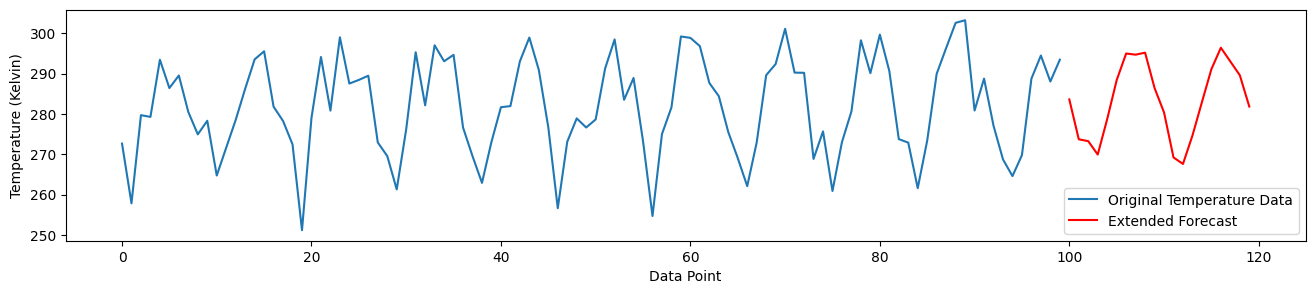

Text(0.5, 1.0, 'fake data for TSA analysis')

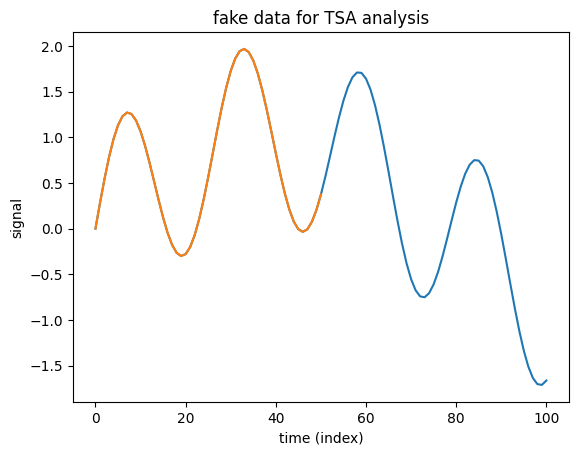

In [24]:

'''
This code does not use weather data, but fake data to illustrate the ideas.
You can ignore this code or use it for inspiration!
'''

# vary the length of the time series as well as the spacing
signal = np.sin(np.linspace(0,10,51)/5) + np.sin(6.*np.linspace(0,10,51)/5)
# try different time series
# signal = np.sin(np.linspace(0,10,51)/5) # this one is easier to forecast - why?

longer_signal = np.sin(np.linspace(0,20,101)/5) + np.sin(6.*np.linspace(0,20,101)/5) # used for validation

#plt.plot(signal)
plt.plot(longer_signal)
plt.xlabel("time (index)")
plt.ylabel("longer")
plt.title("fake data for TSA analysis")

plt.plot(signal)
#plt.plot(longer_signal)
plt.xlabel("time (index)")
plt.ylabel("signal")
plt.title("fake data for TSA analysis")

Text(0.5, 1.0, 'fake data for TSA analysis')

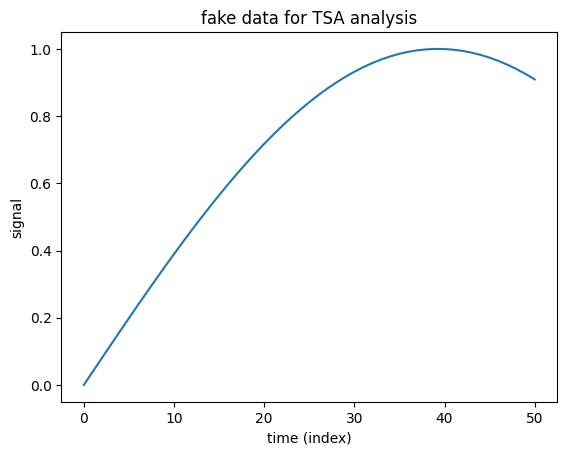

In [69]:

'''
This code does not use weather data, but fake data to illustrate the ideas.
You can ignore this code or use it for inspiration!
'''

# vary the length of the time series as well as the spacing
# signal = np.sin(np.linspace(0,10,51)/5) + np.sin(6.*np.linspace(0,10,51)/5)
# try different time series
signal = np.sin(np.linspace(0,10,51)/5) # this one is easier to forecast - why?

longer_signal = np.sin(np.linspace(0,20,101)/5) + np.sin(6.*np.linspace(0,20,101)/5) # used for validation

plt.plot(signal)
plt.xlabel("time (index)")
plt.ylabel("signal")
plt.title("fake data for TSA analysis")

The second fake data is easier to predict as:

- It is a simple sinusoidal function, which has a regular and predicatable pattern. The first signal is a combination of two sinusoidal functions with different frequencies, which creates more fluctuations and variations in the data.
- The second signal has a longer period, which means it takes more time to complete one cycle. The first signal has a shorter period, so it changes more rapidly and frequently. This makes the second signal more stable and consistent, while the first signal is more dynamic and noisy.
- The second signal has a smaller amplitude, which means it has a smaller range of values. The first signal has a larger amplitude, which means it has a larger range of values. This makes the second signal less sensitive to small errors or deviations, while the first signal is more prone to overfitting or underfitting.

In [70]:
percentage=round(len(temps)/100*70)
temps_test= temps[:percentage]
temps_validation=temps[percentage:]
temps_validation

array([301.1 , 290.23, 290.19, 268.83, 275.65, 260.87, 273.  , 280.61,
       298.25, 290.1 , 299.66, 290.63, 273.75, 272.86, 261.57, 273.39,
       289.95, 296.34, 302.58, 303.23, 280.83, 288.74, 277.06, 268.71,
       264.57, 269.76, 288.73, 294.47, 288.03, 293.44])

In [71]:
signal

array([0.        , 0.03998933, 0.07991469, 0.11971221, 0.15931821,
       0.19866933, 0.23770263, 0.27635565, 0.31456656, 0.35227423,
       0.38941834, 0.42593947, 0.46177918, 0.49688014, 0.5311862 ,
       0.56464247, 0.59719544, 0.62879302, 0.65938467, 0.68892145,
       0.71735609, 0.74464312, 0.77073888, 0.79560162, 0.81919157,
       0.84147098, 0.86240423, 0.88195781, 0.90010044, 0.91680311,
       0.93203909, 0.945784  , 0.95801586, 0.9687151 , 0.9778646 ,
       0.98544973, 0.99145835, 0.99588084, 0.99871014, 0.99994172,
       0.9995736 , 0.99760638, 0.9940432 , 0.98888977, 0.98215432,
       0.97384763, 0.963983  , 0.95257619, 0.93964547, 0.92521152,
       0.90929743])

In [72]:
def organize_dataset(signal, N=1):

    # create empty containers to organize the data into
    X, y = [], []

    for i in range(len(signal) - N):
        a = signal[i:(i + N)]
        X.append(a)
        y.append(signal[i + N])

    return np.array(X), np.array(y)

def predict_next_value(input_vector, a):
    return np.dot(input_vector, a)

# VERY important to vary this N={1,2,3,4,5,6,....}; explain why
N = 2

X, y = organize_dataset(signal, N)

print(X)
print(y)
update = np.linalg.pinv(X)@y
print("update ",update)
# next value
last_values = signal[-N:]
print(signal[-N:])
next_value = predict_next_value(last_values, update)
print(next_value)

[[0.         0.03998933]
 [0.03998933 0.07991469]
 [0.07991469 0.11971221]
 [0.11971221 0.15931821]
 [0.15931821 0.19866933]
 [0.19866933 0.23770263]
 [0.23770263 0.27635565]
 [0.27635565 0.31456656]
 [0.31456656 0.35227423]
 [0.35227423 0.38941834]
 [0.38941834 0.42593947]
 [0.42593947 0.46177918]
 [0.46177918 0.49688014]
 [0.49688014 0.5311862 ]
 [0.5311862  0.56464247]
 [0.56464247 0.59719544]
 [0.59719544 0.62879302]
 [0.62879302 0.65938467]
 [0.65938467 0.68892145]
 [0.68892145 0.71735609]
 [0.71735609 0.74464312]
 [0.74464312 0.77073888]
 [0.77073888 0.79560162]
 [0.79560162 0.81919157]
 [0.81919157 0.84147098]
 [0.84147098 0.86240423]
 [0.86240423 0.88195781]
 [0.88195781 0.90010044]
 [0.90010044 0.91680311]
 [0.91680311 0.93203909]
 [0.93203909 0.945784  ]
 [0.945784   0.95801586]
 [0.95801586 0.9687151 ]
 [0.9687151  0.9778646 ]
 [0.9778646  0.98544973]
 [0.98544973 0.99145835]
 [0.99145835 0.99588084]
 [0.99588084 0.99871014]
 [0.99871014 0.99994172]
 [0.99994172 0.9995736 ]


Now, let's continue for many steps.


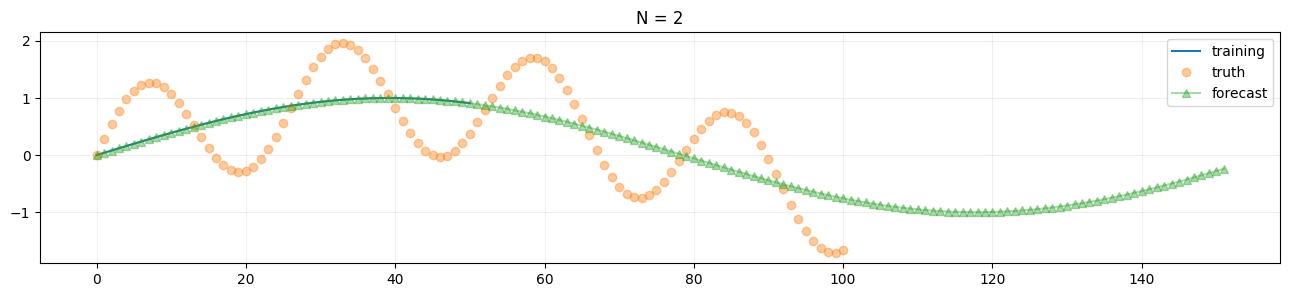

In [73]:
plt.figure(figsize=(16,3))

old_signal = signal.copy()
new_signal = np.append(signal, next_value)

steps = 100

for _ in range(steps):
    last_values = new_signal[-N:]
    next_value = predict_next_value(last_values, update)
    new_signal = np.append(new_signal, next_value)

plt.title(f"N = {N}")
plt.plot(signal, label='training')
plt.plot(longer_signal, 'o', alpha=0.4, label='truth')
plt.plot(new_signal, '-^', alpha=0.4, label='forecast')
plt.legend()
plt.grid(alpha=0.2)

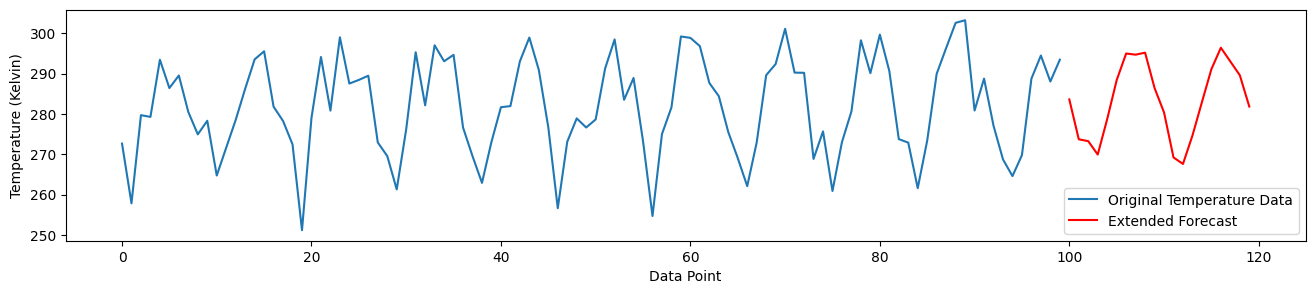

In [75]:
def organize_dataset(signal, N=20):
    """ Organize the data into X an y. """
    X, y = [], []
    for i in range(len(signal) - N):
        a = signal[i:(i + N)]
        X.append(a)
        y.append(signal[i + N])
    return np.array(X), np.array(y)

def predict_next_value(input_vector, a):
    """ Predict the next value. """
    if input_vector.ndim == 1:
        input_vector = input_vector.reshape(1, -1)
    if a.ndim == 1:
        a = a.reshape(-1, 1)
    return np.dot(input_vector, a)

N = 20

X, y = organize_dataset(temps, N)

update = np.linalg.pinv(X) @ y.reshape(-1, 1)

forecasted_temps = []
current_temps = temps.copy()
steps = 20
for _ in range(steps):
    if len(current_temps) < N:
        last_values = np.concatenate((temps[:N - len(current_temps)], current_temps))
    else:
        last_values = current_temps[-N:]

    next_value = predict_next_value(last_values, update)
    forecasted_temps.append(next_value.item())
    current_temps = np.append(current_temps, next_value)
plt.figure(figsize=(16, 3))
plt.plot(temps, label='Original Temperature Data')
plt.plot(range(len(temps), len(temps) + steps), forecasted_temps, color='red', label='Extended Forecast')
plt.xlabel("Data Point")
plt.ylabel("Temperature (Kelvin)")
plt.legend()
plt.show()

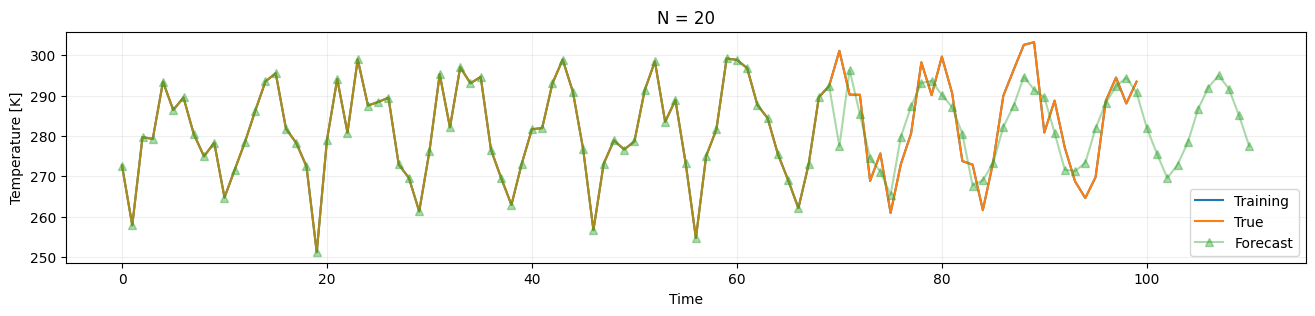

In [79]:
plt.figure(figsize=(16,3))

temps_full= np.append(temps_test,temps_validation)
old_signal = temps_full.copy()
new_signal = np.append(temps_test, next_value)

steps = 40

for _ in range(steps):

  last_values = new_signal[-N:]
  next_value = predict_next_value(last_values, update)
  new_signal = np.append(new_signal, next_value)

plt.title(f"N = {N}")
plt.plot(old_signal, label='Training')
plt.plot(temps, label='True')
plt.plot(new_signal, '-^', alpha=0.4, label='Forecast')
plt.xlabel("Time")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(alpha=0.2)

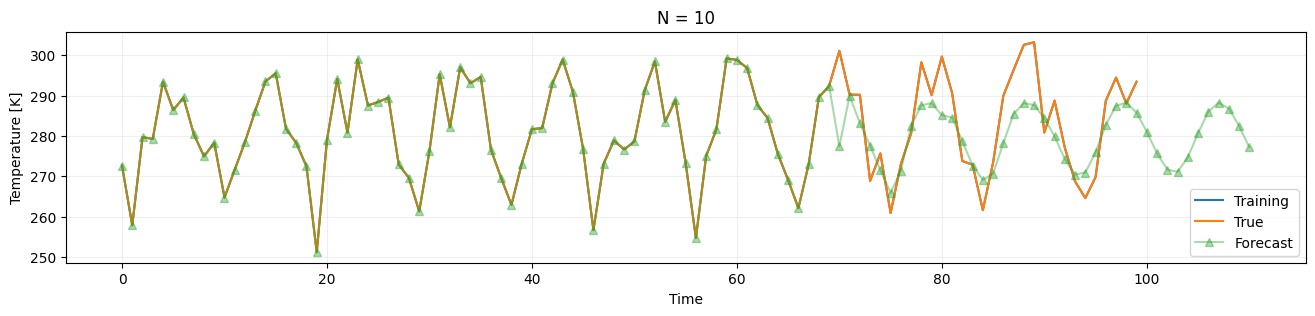

In [82]:
plt.figure(figsize=(16,3))

temps_full= np.append(temps_test,temps_validation)
old_signal = temps_full.copy()
new_signal = np.append(temps_test, next_value)
N=10
X, y = organize_dataset(temps, N)

update = np.linalg.pinv(X) @ y.reshape(-1, 1)

forecasted_temps = []
current_temps = temps.copy()
steps = 40

for _ in range(steps):
  last_values = new_signal[-N:]
  next_value = predict_next_value(last_values, update)
  new_signal = np.append(new_signal, next_value)

plt.title(f"N = {N}")
plt.plot(old_signal, label='Training')
plt.plot(temps, label='True')
plt.plot(new_signal, '-^', alpha=0.4, label='Forecast')
plt.xlabel("Time")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(alpha=0.2)

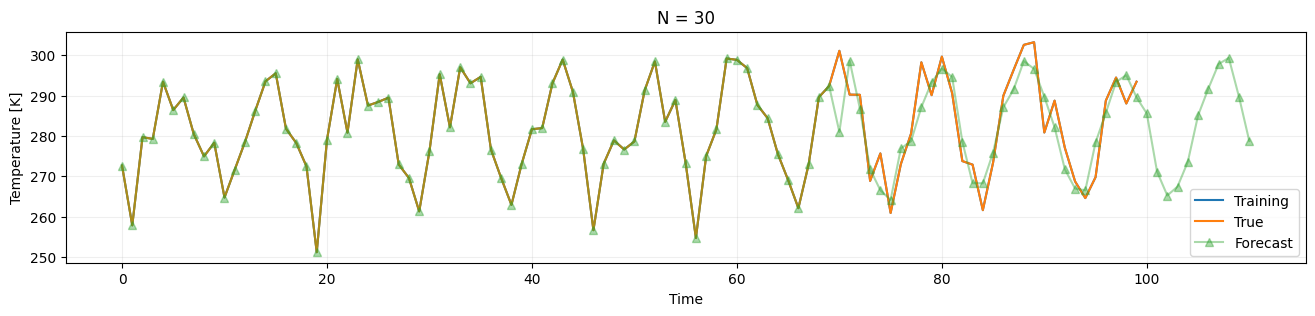

In [84]:
plt.figure(figsize=(16,3))

temps_full= np.append(temps_test,temps_validation)
old_signal = temps_full.copy()
new_signal = np.append(temps_test, next_value)
N=30
X, y = organize_dataset(temps, N)

update = np.linalg.pinv(X) @ y.reshape(-1, 1)

forecasted_temps = []
current_temps = temps.copy()
steps = 40

for _ in range(steps):
  last_values = new_signal[-N:]
  next_value = predict_next_value(last_values, update)
  new_signal = np.append(new_signal, next_value)

plt.title(f"N = {N}")
plt.plot(old_signal, label='Training')
plt.plot(temps, label='True')
plt.plot(new_signal, '-^', alpha=0.4, label='Forecast')
plt.xlabel("Time")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(alpha=0.2)

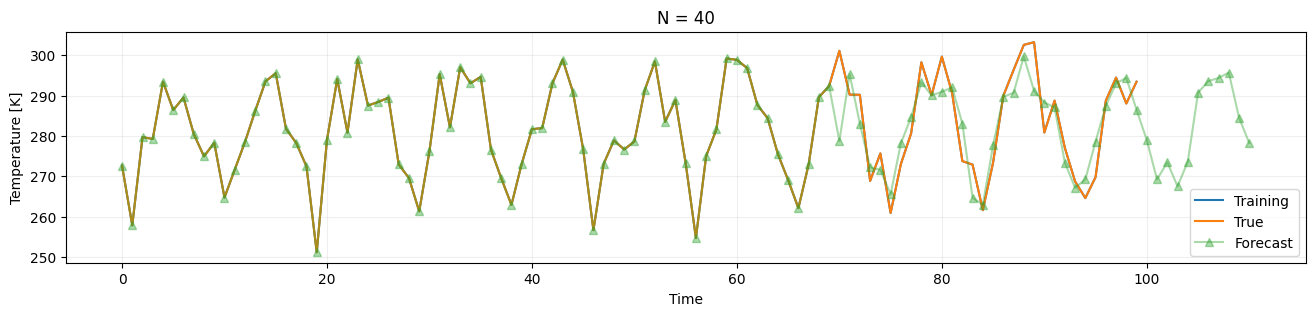

In [85]:
plt.figure(figsize=(16,3))

temps_full= np.append(temps_test,temps_validation)
old_signal = temps_full.copy()
new_signal = np.append(temps_test, next_value)
N=40
X, y = organize_dataset(temps, N)

update = np.linalg.pinv(X) @ y.reshape(-1, 1)

forecasted_temps = []
current_temps = temps.copy()
steps = 40

for _ in range(steps):
  last_values = new_signal[-N:]
  next_value = predict_next_value(last_values, update)
  new_signal = np.append(new_signal, next_value)

plt.title(f"N = {N}")
plt.plot(old_signal, label='Training')
plt.plot(temps, label='True')
plt.plot(new_signal, '-^', alpha=0.4, label='Forecast')
plt.xlabel("Time")
plt.ylabel("Temperature [K]")
plt.legend()
plt.grid(alpha=0.2)


Once you have your weather forecast working, answer all of the questions above in a markdown cell. In particular:
* How important is the value of $N$?
* Is there a value of $N$ that is "too small"? Too large?
* What if the data is not sampled frequently enough? Too frequently?
* Should the data be scaled?
* How much signal do you need? What if you train on less/more data?
* Can you control the time scale over which you can forecast?
* Does your group have ideas for improving this algorithm? (e.g., remove the mean, remove trends first...)

1. The value of N is important as it shows the number of data to predict the next value.
2. If N is too small then it will not be accurate. It will not consider past data. However, if it is too large then it will become immune to recent changes and it will be complex.
3. If it is not sampled enough then important short-term fluctuations and patterns may not be captured, leading to a loss of valuable information. Too frequently will introduce noise in the data.
4. It depends on the data. However, scaling data helps to converge data faster.
5. It depends on the data. Too much means it will be overfitting although there will be higher chance of accuracy. Less will result in inaccuracy.
6. Yes, you can control the forecasting time scale by adjusting the sampling frequency of your data and setting the forecast horizon, thereby focusing your predictions on short-term, medium-term, or long-term trends as needed.
7. We can do improvement such as removing the mean if the data is centered around 0, we can apply rms to stabilize the variance, etc.

____
## <font color=#AAFF00> TSA Projects </font>

TSA is a popular topic for the final project. There are many applications:
* music
* finance
* brain waves
* sleep cycles
* and so on....

And, forecasting is just one goal within TSA. Also, even within forecasting, there is the option of forecasting many variables together simultaneously. Two examples:
1. forecast the weather by using temperature, pressure and humidity simultaneously,
  * an interesting idea would be to forecast the weather in two nearby cities together, such as Lansing and Chicago,
2. forecast many tech stocks together.

You can explore ideas like causality. You get the idea - it's a rich area.